# Augmentation of the 4 Pics 1 Word image set experiment

This demo shall demonstrate possible approaches of extending the image set or increasing it's image quality using computer vision techniques.

## Base setup

In [145]:
from keras.preprocessing import image
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

def img_path_to_tensor(img_path, region, tar_size=(32,32)):
    """
    Loads an image and converts it into a tensor.
    
    img_path = The image file path
    region = The region to crop of a huge image. None may be passed if croping is not required
    tar_size = A tuple containing the required target size
    """
    img = image.load_img(img_path)
    if region is not None:
        img = img.crop(region)
    if tar_size is not None:
        img = img.resize(tar_size, resample=PIL.Image.BICUBIC)
    return np.array(img)

## Present example image set

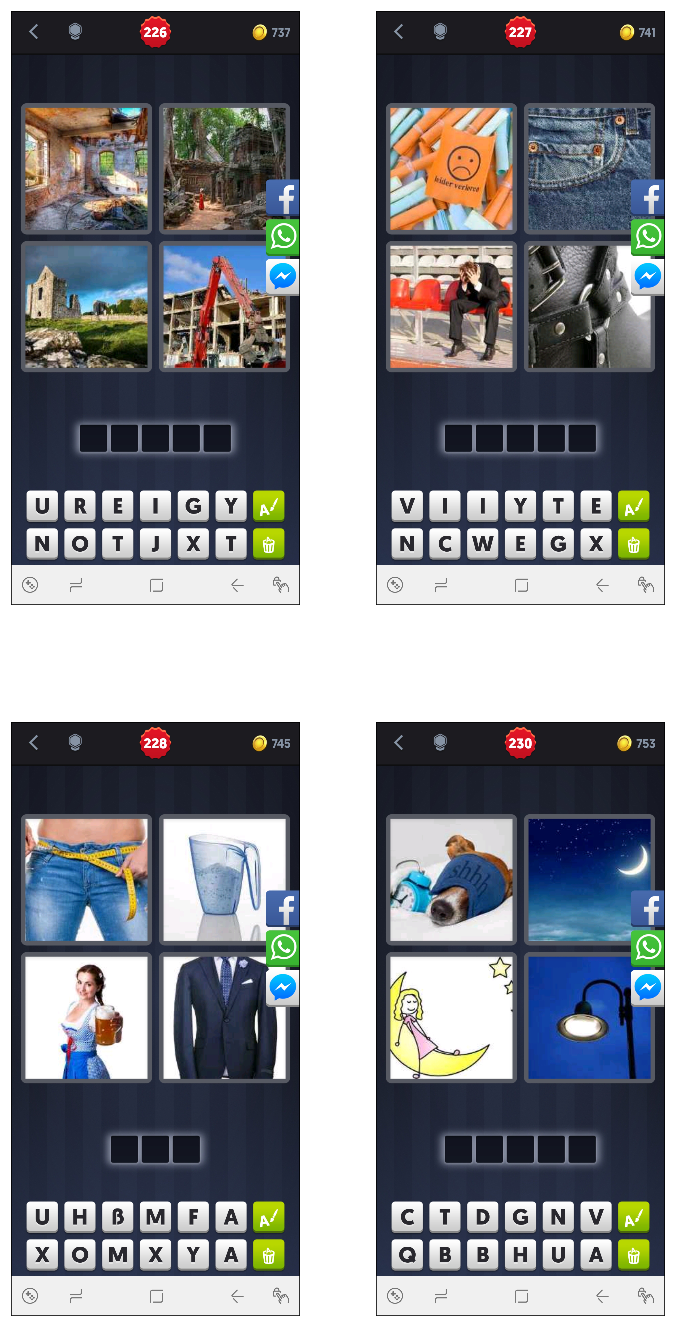

In [34]:
image_mask = "images/testimg{:02d}.jpg"

example_images = []

for example_index in range(4):
    example_images.append(img_path_to_tensor(image_mask.format(example_index), None, None))
    
columns = 2
rows = 2
total_samples = columns*rows

fig = plt.figure(figsize=(columns*6,rows*12))

for i in range(total_samples):
    sample_idx = i
    ax = fig.add_subplot(rows, columns, i + 1, xticks=[], yticks=[])
    cur_org = example_images[i]
    ax.imshow(cur_org)

## Extraction of sub images

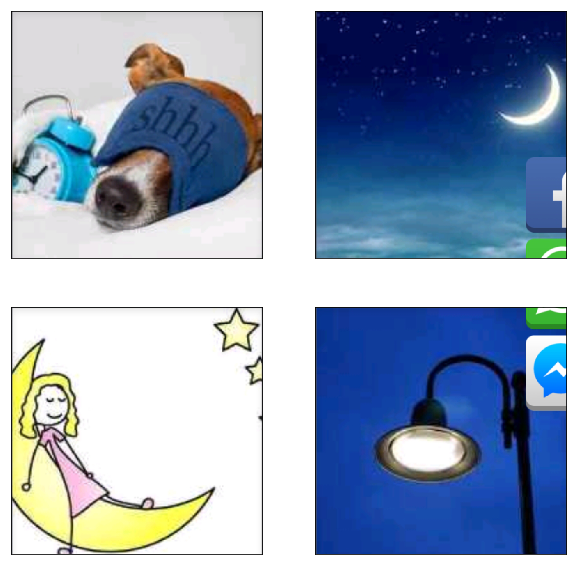

In [146]:
subpic_regions = []

# left limits
example_left_0 = 69
example_left_1 = 756
# top limits
example_top_0 = 486
example_top_1 = 1170
# sample size
example_width = 683-example_left_0
example_height = 1090-example_top_0

subpic_regions.append([example_left_0,example_top_0,example_left_0+example_width,example_top_0+example_height])
subpic_regions.append([example_left_1,example_top_0,example_left_1+example_width,example_top_0+example_height])
subpic_regions.append([example_left_0,example_top_1,example_left_0+example_width,example_top_1+example_height])
subpic_regions.append([example_left_1,example_top_1,example_left_1+example_width,example_top_1+example_height])

def get_sub_image(main_index, sub_index):
    image = example_images[main_index]
    region = subpic_regions[sub_index]
    sub_image = image[region[1]:region[3],region[0]:region[2],:]
    
    return sub_image
    
columns = 2
rows = 2
total_samples = columns*rows

# Display the images
fig = plt.figure(figsize=(10,10))

for i in range(total_samples):
    sub_img = get_sub_image(3,i)
    sample_idx = i
    ax = fig.add_subplot(columns,rows,i+1, xticks=[], yticks=[])
    ax.imshow(sub_img)
    

## Application of the canny edge detector

Apply the canny edge detector using custom thresholds for each image to highlight just enough features to
still be able to win the game.

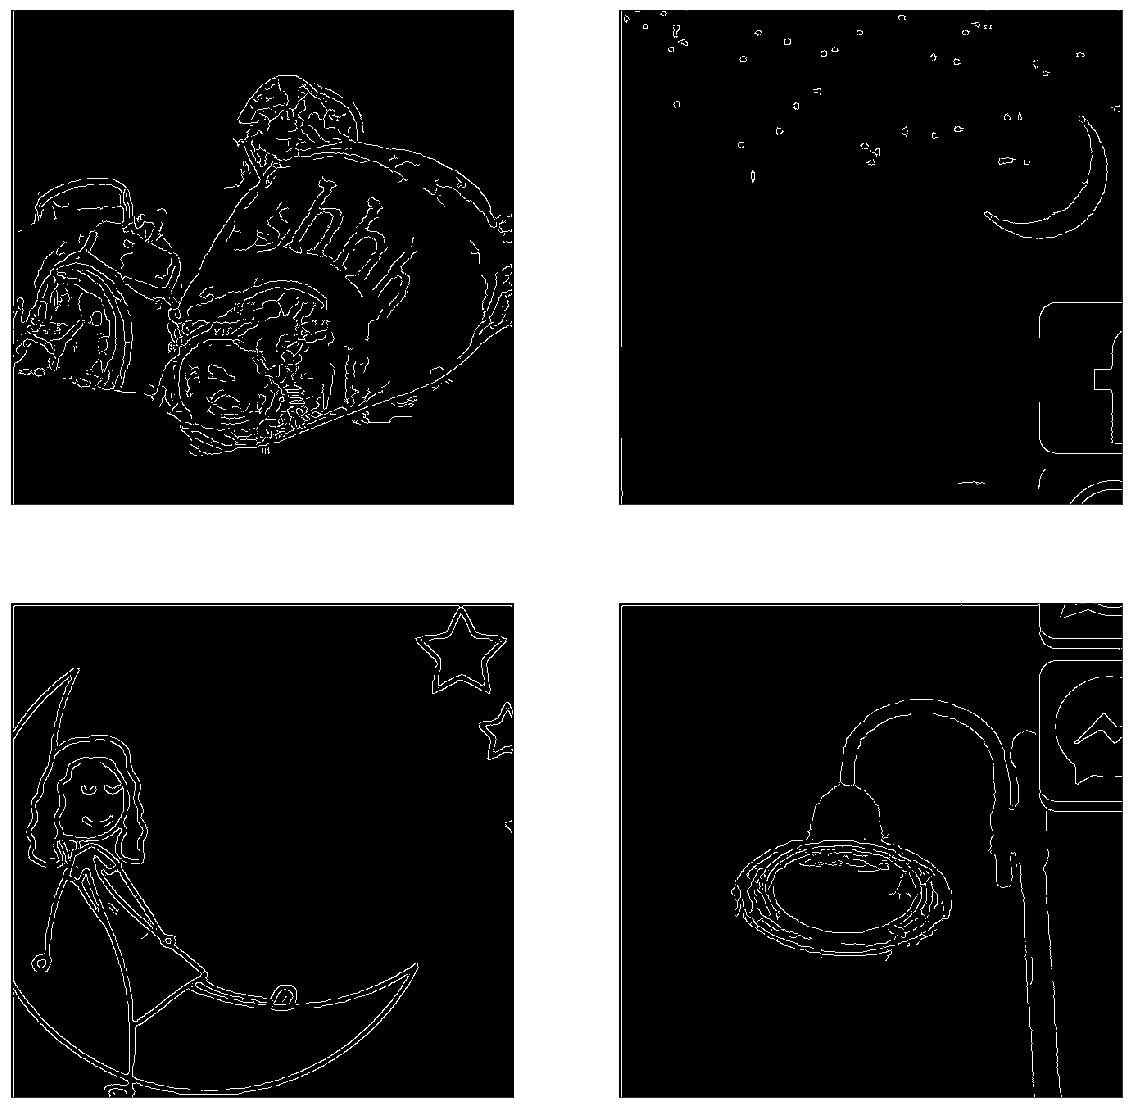

In [143]:
def get_edges(img, low_threshold = 40, high_threshold = 90):
    # Read in the image and convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Define a kernel size for Gaussian smoothing / blurring
    # Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

    # Define parameters for Canny and run it
    # NOTE: if you try running this code you might want to change these!    
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    
    return edges

# Display the images
fig = plt.figure(figsize=(20,20))

thresh_holds = [(10,50), None, None, (10,50)]

for i in range(total_samples):
    thresh_min = 40
    thresh_max = 90
    cur_thresh = thresh_holds[i]
    if cur_thresh is not None:
        thresh_min = cur_thresh[0]
        thresh_max = cur_thresh[1]
    sub_img = get_edges(get_sub_image(3,i), thresh_min, thresh_max)
    sample_idx = i
    ax = fig.add_subplot(columns,rows,i+1, xticks=[], yticks=[])
    ax.imshow(sub_img, cmap='Greys_r')